# Introduction  
Lets have an example of Story telling with data and using multiple ML models to predict various parameters giving full flexibilty to the business.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

Loading the dataset

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
type(tips)

pandas.core.frame.DataFrame

In [ ]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


### Data Visualisation

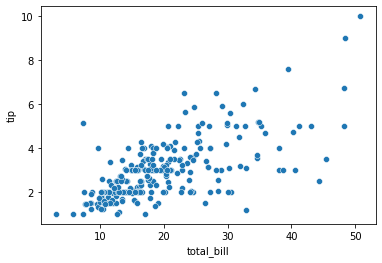

In [ ]:
#Here we do a scatterplot and find the relatinship to be approximately linear between tip and total bill
sns.scatterplot(x='total_bill', y='tip', data=tips)

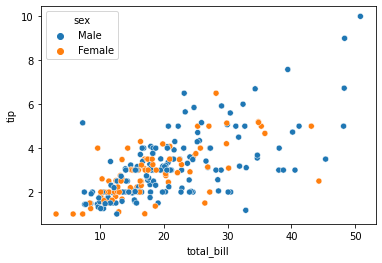

In [ ]:
# To gain more insight we catagorize tip vs total bill based on gender of customer
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='sex')

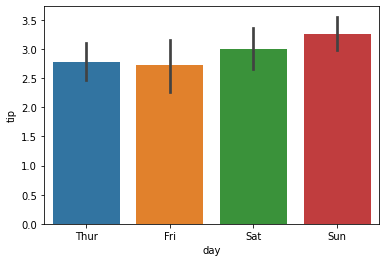

In [ ]:
#Now we plot a bar plot to compare day wise earnings
sns.barplot(x='day', y='tip', data=tips)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


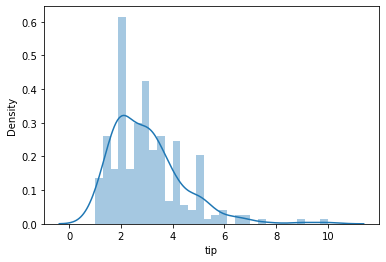

In [ ]:
# The following grps are variations of Histograms which give distribitions of data
sns.distplot(tips['tip'], kde=True, bins=30)

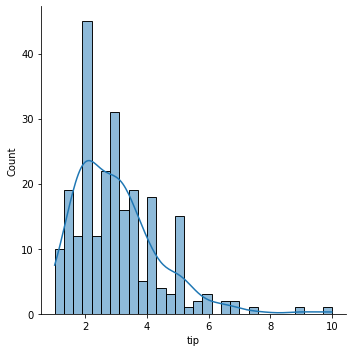

In [ ]:
sns.displot(tips['tip'], kde=True, bins=30)

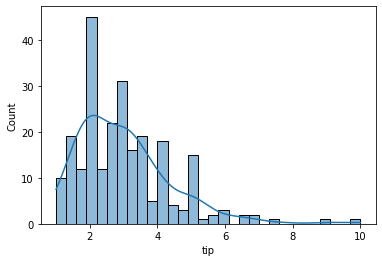

In [ ]:
sns.histplot(tips['tip'], kde=True, bins=30)

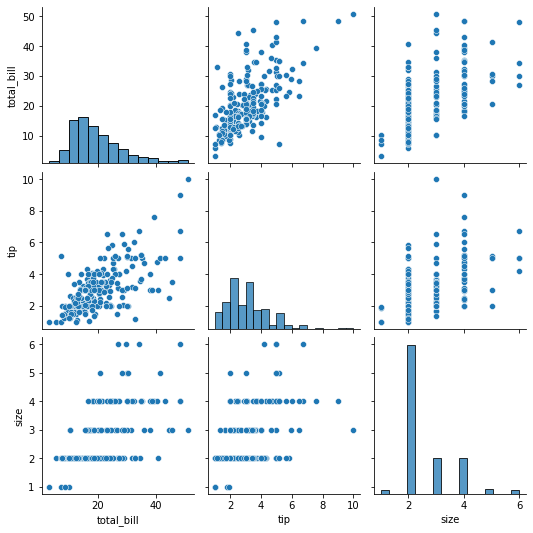

In [ ]:
# Pair plot is helpful to visualise variance and graph of parameters against each other
sns.pairplot(data=tips)

### One Hot Encoding to fix dataset

Before applying any ML algorithm we need to perform one hot encoding to convert groups and their names into numericals

We are going to keep the name of all sub groups so that it is easy for us to enter values in future.

In [ ]:
days = pd.get_dummies(tips['day'], drop_first=False)
days

,Thur,Fri,Sat,Sun
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
239,0,0,1,0
240,0,0,1,0
241,0,0,1,0
242,0,0,1,0


In [ ]:
time = pd.get_dummies(tips['time'], drop_first=False)
time

,Lunch,Dinner
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
239,0,1
240,0,1
241,0,1
242,0,1


In [ ]:
smoke = pd.get_dummies(tips['smoker'], drop_first=False)
smoke

,Yes,No
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
239,0,1
240,1,0
241,1,0
242,0,1


In [ ]:
sex = pd.get_dummies(tips['sex'], drop_first=False)
sex

,Male,Female
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
239,1,0
240,0,1
241,1,0
242,1,0


We now remove the old columns with strings

In [ ]:
new_tips=tips.drop(['sex','day','time','smoker'], axis=1, inplace=False)
new_tips

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4
...,...,...,...
239,29.03,5.92,3
240,27.18,2.00,2
241,22.67,2.00,2
242,17.82,1.75,2


Now we concate the above columns to make data ready to feed it to a ML algorithm

In [ ]:
new_tips = pd.concat([new_tips, sex, smoke, days, time], axis=1)
new_tips

,total_bill,tip,size,Male,Female,Yes,No,Thur,Fri,Sat,Sun,Lunch,Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


#### Vizualising again with pair plot

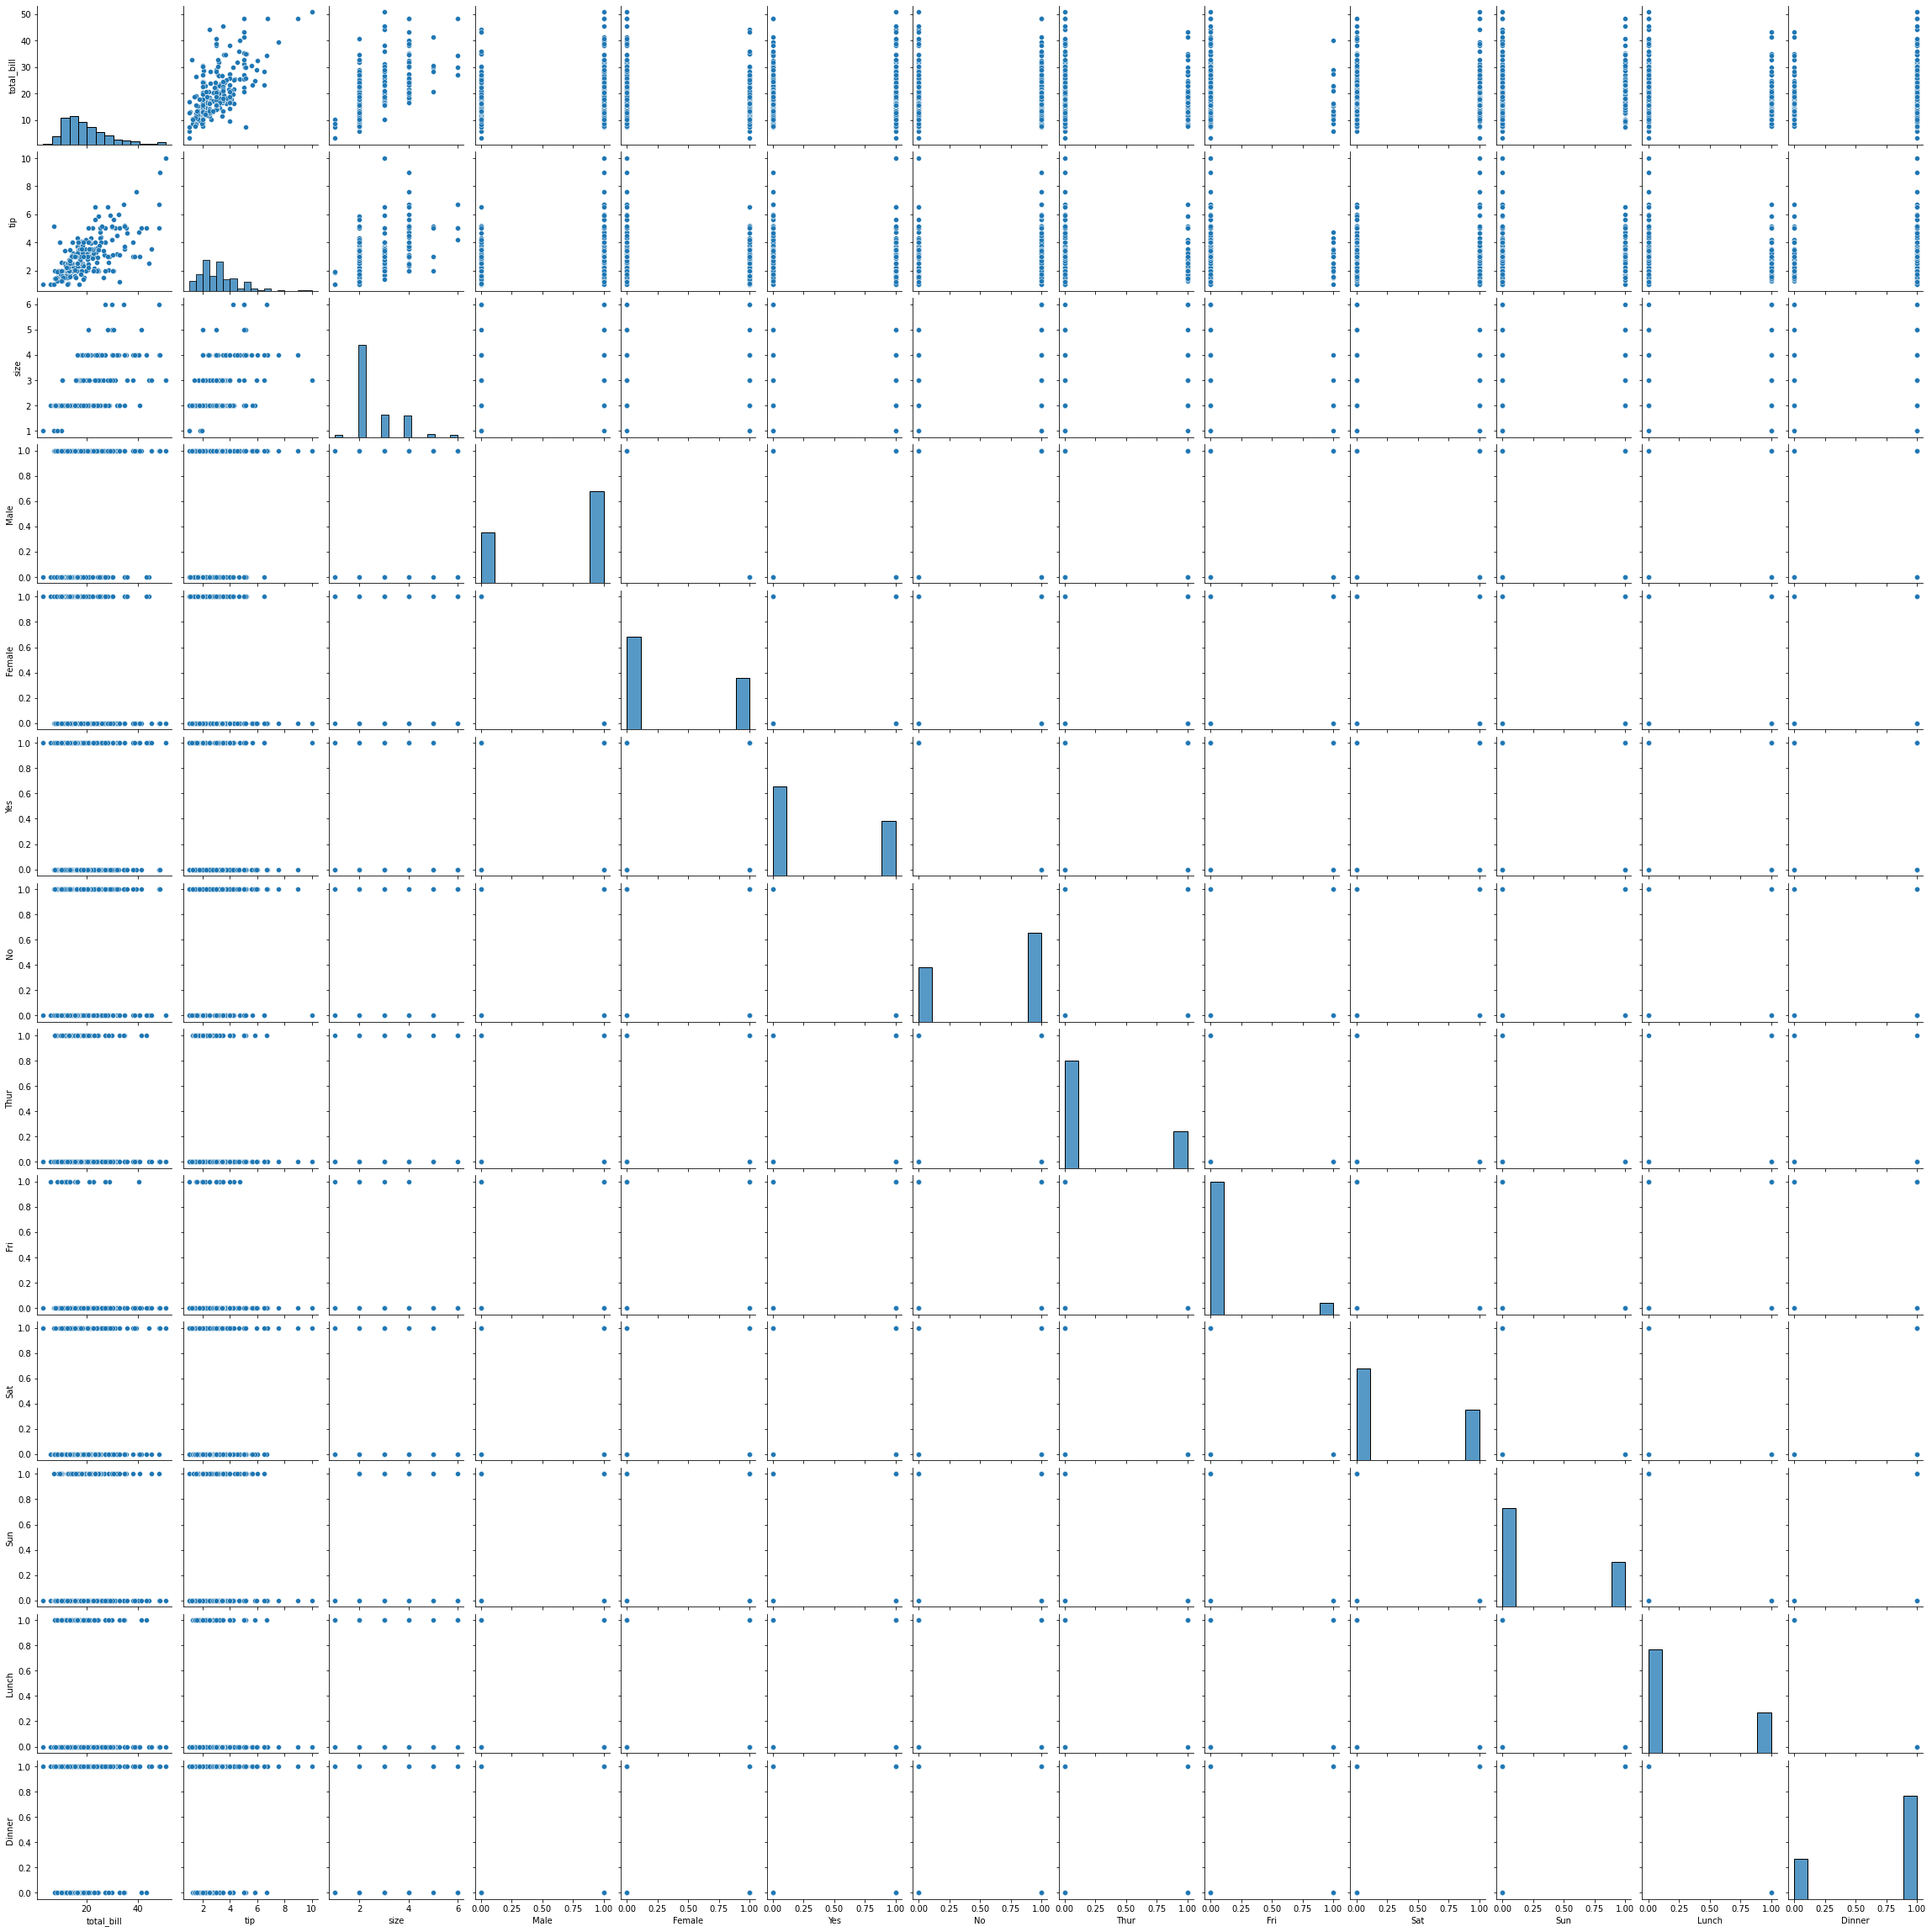

In [ ]:
sns.pairplot(data=new_tips)

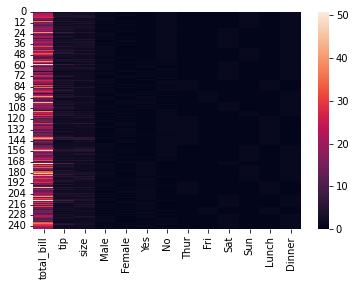

In [ ]:
sns.heatmap(data=new_tips)

### ML Algorithm Selection route map  
Need Dimension Reduction (NO) --> Is Data Labelled (YES) --> Predicting Numeric value? (YES) --> Speed or Accuracy (SPEED)  
  
We are considering speed we have a small dataset and its ok for results to be approximate.

Data segmentaion to Test and Train

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(new_tips.drop('tip', axis=1), new_tips['tip'], test_size=0.25, random_state=101)

In [ ]:
x_train

,total_bill,size,Male,Female,Yes,No,Thur,Fri,Sat,Sun,Lunch,Dinner
15,21.58,2,1,0,0,1,0,0,0,1,0,1
98,21.01,2,1,0,1,0,0,1,0,0,0,1
217,11.59,2,1,0,1,0,0,0,1,0,0,1
50,12.54,2,1,0,0,1,0,0,0,1,0,1
2,21.01,3,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
63,18.29,4,1,0,1,0,0,0,1,0,0,1
70,12.02,2,1,0,0,1,0,0,1,0,0,1
81,16.66,2,1,0,0,1,1,0,0,0,1,0
11,35.26,4,0,1,0,1,0,0,0,1,0,1


In [ ]:
y_train

15     3.92
98     3.00
217    1.50
50     2.50
2      3.50
       ... 
63     3.76
70     1.97
81     3.40
11     5.00
95     4.73
Name: tip, Length: 183, dtype: float64

#### Linear Regression for "Tip" prediction

Using Machine Learning to predict the amount of tip based on customer details for the order

Now lets try to apply some ML algorithm to predict the Tip for given parameters 

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression

In [ ]:
model_lin_reg = LinearRegression().fit(x_train,y_train)

In [ ]:
model_lin_reg.score(x_train, y_train)

0.5225897232462324

In [ ]:
prediction = model_lin_reg.predict(x_test)
prediction

array([2.2439024 , 2.78499868, 2.235506  , 3.84561198, 3.79050231,
       2.0421289 , 6.37006824, 2.39627188, 1.39935313, 1.90177619,
       3.15741547, 2.7027649 , 1.91873185, 2.18750534, 2.27002501,
       2.53641449, 2.41351344, 3.25133374, 2.27480067, 2.90838302,
       2.50144344, 3.87257603, 4.15846145, 2.31111734, 4.11755709,
       1.9679479 , 2.91788982, 3.69348189, 5.05553619, 3.56934082,
       5.61071853, 4.0387159 , 2.48658026, 6.65238868, 3.10339678,
       2.43905861, 3.19300177, 2.34351689, 3.62430755, 3.9163279 ,
       2.842352  , 5.06066491, 4.3883719 , 5.86366089, 3.43403968,
       2.08608427, 3.38918317, 4.56047677, 1.85157136, 2.81592443,
       3.48064027, 3.13577642, 2.75803693, 4.05180325, 4.87009124,
       2.61165522, 2.32974042, 2.66750796, 2.94756978, 3.2790334 ,
       4.260655  ])

##### Metrics for evaluation

In [ ]:
from sklearn import metrics

In [ ]:
print(metrics.mean_squared_error(y_test, prediction))
print(metrics.mean_absolute_error(y_test, prediction))
print(np.sqrt(metrics.mean_squared_error(y_test, prediction)))

1.456385271636951
0.8927042298137938
1.2068078851403612


In [ ]:
coef = pd.DataFrame(model_lin_reg.coef_, new_tips.drop('tip', axis=1).columns)
coef

,0
total_bill,0.105973
size,0.173799
Male,-0.019831
Female,0.019831
Yes,-0.110714
No,0.110714
Thur,-0.084923
Fri,0.126528
Sat,0.003359
Sun,-0.044964


#### MultiClass Classification for Customer Gender prediction

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(new_tips.drop(['Male','Female'], axis=1), new_tips[['Male','Female']], test_size=0.25, random_state=101)

In [ ]:
x_train1

,total_bill,tip,size,Yes,No,Thur,Fri,Sat,Sun,Lunch,Dinner
15,21.58,3.92,2,0,1,0,0,0,1,0,1
98,21.01,3.00,2,1,0,0,1,0,0,0,1
217,11.59,1.50,2,1,0,0,0,1,0,0,1
50,12.54,2.50,2,0,1,0,0,0,1,0,1
2,21.01,3.50,3,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
63,18.29,3.76,4,1,0,0,0,1,0,0,1
70,12.02,1.97,2,0,1,0,0,1,0,0,1
81,16.66,3.40,2,0,1,1,0,0,0,1,0
11,35.26,5.00,4,0,1,0,0,0,1,0,1


In [ ]:
y_train1

,Male,Female
15,1,0
98,1,0
217,1,0
50,1,0
2,1,0
...,...,...
63,1,0
70,1,0
81,1,0
11,0,1


##### Two column classification using Linear Regression.  
As we can see that the two column arrays are predicted in real numbers which are similar to probability of prediction respective classes. 

In [ ]:
model_lin_reg_2 = LinearRegression().fit(x_train1,y_train1)

In [ ]:
prediction1 = model_lin_reg_2.predict(x_test1)
prediction1

array([[0.71160241, 0.28839759],
       [0.73660761, 0.26339239],
       [0.62273409, 0.37726591],
       [0.79591808, 0.20408192],
       [0.76944628, 0.23055372],
       [0.72607985, 0.27392015],
       [0.85707799, 0.14292201],
       [0.40226429, 0.59773571],
       [0.56501771, 0.43498229],
       [0.47215111, 0.52784889],
       [0.74128768, 0.25871232],
       [0.72357972, 0.27642028],
       [0.47517805, 0.52482195],
       [0.3946545 , 0.6053455 ],
       [0.64379122, 0.35620878],
       [0.72842114, 0.27157886],
       [0.61392453, 0.38607547],
       [0.68103548, 0.31896452],
       [0.48484587, 0.51515413],
       [0.76232968, 0.23767032],
       [0.73477301, 0.26522699],
       [0.50853194, 0.49146806],
       [0.7231664 , 0.2768336 ],
       [0.70679227, 0.29320773],
       [0.68612206, 0.31387794],
       [0.72541397, 0.27458603],
       [0.72233242, 0.27766758],
       [0.49226614, 0.50773386],
       [0.59622528, 0.40377472],
       [0.55011626, 0.44988374],
       [0.

In [ ]:
from sklearn.multioutput import MultiOutputClassifier 
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_multi_class = MultiOutputClassifier(KNeighborsClassifier()).fit(x_train1,y_train1)

In [ ]:
prediction2 = model_multi_class.predict(x_test1)
prediction2

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

##### Metrics for evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
cf = confusion_matrix(y_test1.values.argmax(axis=1), prediction2.argmax(axis=1))
cf

array([[33,  7],
       [18,  3]])

##### Confusion Matrix plotting

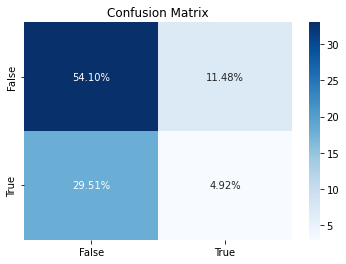

In [ ]:
labels = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf, annot=labels, fmt='', cmap='Blues')

ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

plt.show()

In [ ]:
print(classification_report(y_test1.values.argmax(axis=1), prediction2.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.65      0.82      0.73        40
           1       0.30      0.14      0.19        21

    accuracy                           0.59        61
   macro avg       0.47      0.48      0.46        61
weighted avg       0.53      0.59      0.54        61



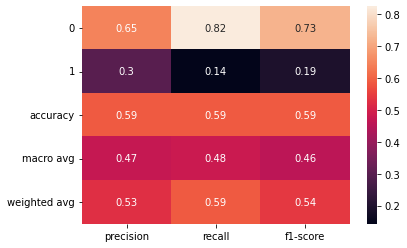

In [ ]:
clf_report=classification_report(y_test1.values.argmax(axis=1), prediction2.argmax(axis=1), output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)

## Conclusion  
As we see that after trying various algorithms we are able to achieve 60% accuracy and cannot push it further.  
Now, since that dataset is small this is as expected.